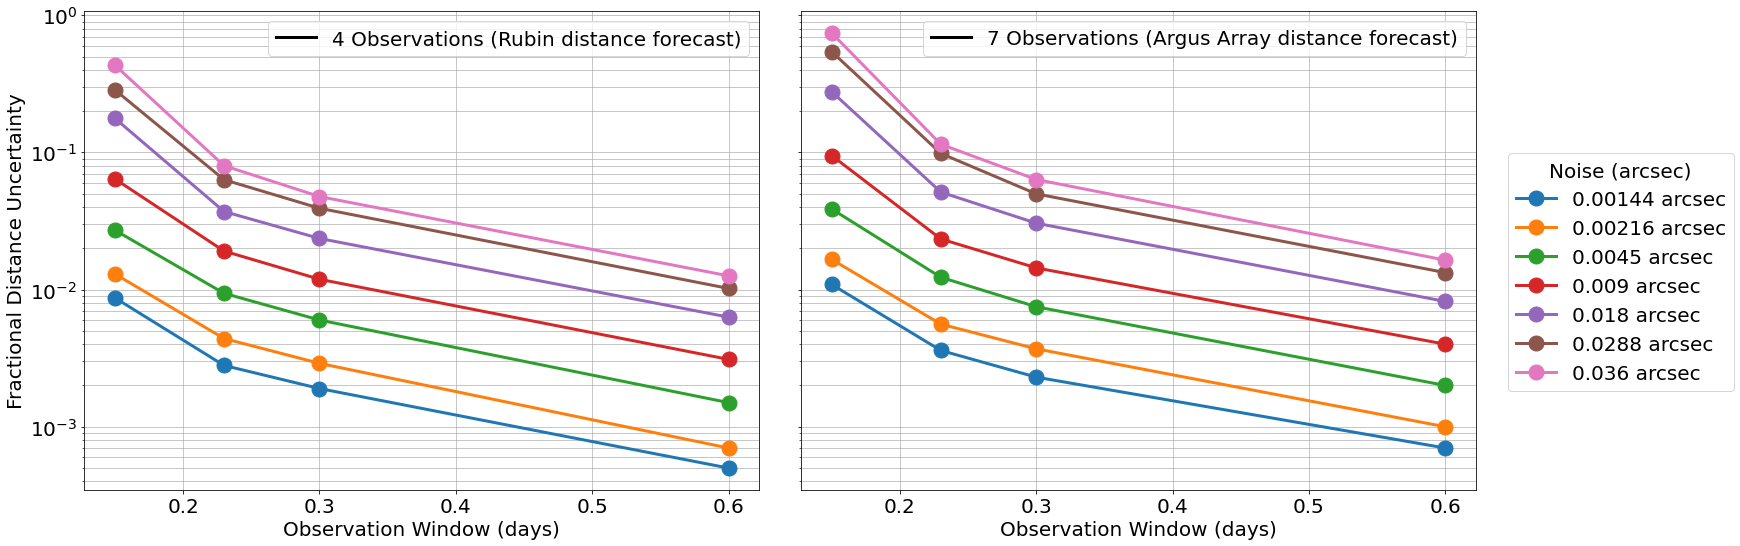

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 20})

# Observation windows
windows = [0.15, 0.23, 0.30, 0.60]

# 4 observations data (rows = noise levels)
data4 = [
    [0.0087, 0.0028, 0.0019, 0.0005],
    [0.0130, 0.0044, 0.0029, 0.0007],
    [0.0271, 0.0094, 0.0060, 0.0015],
    [0.0641, 0.0191, 0.0119, 0.0031],
    [0.1772, 0.0371, 0.0236, 0.0063],
    [0.2857, 0.0633, 0.0392, 0.0102],
    [0.4325, 0.0801, 0.0477, 0.0126]
]

# 7 observations data
data7 = [
    [0.0109, 0.0036, 0.0023, 0.0007],
    [0.0166, 0.0056, 0.0037, 0.0010],
    [0.0387, 0.0123, 0.0075, 0.0020],
    [0.0949, 0.0234, 0.0144, 0.0040],
    [0.2772, 0.0514, 0.0305, 0.0082],
    [0.5426, 0.0984, 0.0499, 0.0133],
    [0.7423, 0.1148, 0.0635, 0.0164]
]

# Noise levels
noise = [0.00144, 0.00216, 0.00450, 0.00900, 0.0180, 0.0288, 0.0360]

# Figure with two panels
fig, axes = plt.subplots(1, 2, figsize=(21, 8), sharey=True)

# Plot 4 obs (left)
for i, row in enumerate(data4):
    axes[0].plot(windows, row, marker='o', label=f"{noise[i]} arcsec",
                 markersize=15, linewidth=3)
axes[0].set_xlabel("Observation Window (days)")
axes[0].set_ylabel("Fractional Distance Uncertainty")
axes[0].set_yscale('log')
axes[0].grid(True, which='both', linestyle='-', linewidth=0.7)

# Plot 7 obs (right)
for i, row in enumerate(data7):
    axes[1].plot(windows, row, marker='o', label=f"{noise[i]} arcsec",
                 markersize=15, linewidth=3)
axes[1].set_xlabel("Observation Window (days)")
axes[1].set_yscale('log')
axes[1].grid(True, which='both', linestyle='-', linewidth=0.7)

# Single common legend on the right (closer)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Noise (arcsec)",
           loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)

# Legends inside each panel
axes[0].legend([Line2D([0],[0], color='black', lw=3)],
               ["4 Observations (8-meter telescope distance forecast)"],
               loc='upper right', frameon=True)

axes[1].legend([Line2D([0],[0], color='black', lw=3, linestyle='-')],
               ["7 Observations (Argus Array distance forecast)"],
               loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig("fractional_distance_uncertainty.png", dpi=300, bbox_inches="tight")
plt.show()